# ロジスティック成長曲線を用いたアプリリリース直後のDL数推移の予測モデル

# モデル式

$ y=\dfrac{D}{1+e^{-r(x*a-x_0)}}$

- $D$：予測されるダウンロード数の上限
- $r$：成長率。インプレッション数が増えるにつれて、どの程度急速にダウンロード数が増えるかを示す
- $x_0$
​
 ：成長曲線の傾きが変わる点（インプレッション数）
- $a$:認知率
認知率が低いときは成長が緩やかで、高いときには成長が速くなる

# モデル概要

### インプレッション数、認知率、ロジスティック成長曲線とは？
- インプレッション数：アプリが広告としてユーザーに見られた回数
- 認知率：アプリがユーザーにどのくらい知られているかの割合
- ロジスティック成長曲線
 - あるもの（ここではダウンロード数）が時間やインプレッション数が増えるにつれてどう増えていくかを表す曲線のこと。最初は少しずつ増えていき、途中から急に増えていきますが、最終的には上限に近づき増加率が減少する。

### なぜ認知率を使うのか？
認知率が高い方がダウンロードする可能性が高くなるため。



# モデルの実装と検証

## インプレッション数と認知率込みのモデル

In [125]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_logistic_curve_with_awareness(data):
    """
    インプレッション数、認知率、ダウンロード数を含むデータに基づいて、認知率を考慮した
    ロジスティック成長曲線をフィッティングし、結果をプロットします。

    Parameters:
    data (pd.DataFrame): インプレッション数 ('impressions'列)、認知率 ('awareness_rate'列)、ダウンロード数 ('downloads'列)を含むデータフレーム。
    """

    # ロジスティック成長曲線（認知率を考慮したバージョン）
    def logistic_curve_with_awareness(x, L, k, x0):
        return L / (1 + np.exp(-k * (x  - x0)))

    # データの準備
    xdata = data['impressions']*data['awareness_rate']
    ydata = data['downloads']

    # 初期パラメータの設定
    p0 = [max(ydata), 0.001, np.median(xdata)]  # L, k, x0, a の初期値

    # フィッティング
    popt, _ = curve_fit(
        lambda x, L, k, x0: logistic_curve_with_awareness(x, L, k, x0),
        xdata, ydata, p0=p0, maxfev=10000
    )

    # フィッティング結果の予測カーブの計算
    x_fit = np.linspace(min(xdata), max(xdata)*1.5, 1000)
    y_fit = logistic_curve_with_awareness(x_fit, *popt)

    # 結果のプロット
    plt.figure(figsize=(10, 6))
    plt.scatter(xdata, ydata, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label='Logistic Fit', color='red')
    plt.xlabel('Impressions')
    plt.ylabel('Downloads')
    plt.legend()
    plt.title('Logistic Growth Curve with Awareness Fit')
    plt.show()

    # 最適パラメータの表示
    L, k, x0 = popt
    print(f"Optimal Parameters:\nL (max downloads) = {L}\nk (growth rate) = {k}\nx0 (inflection point) = {x0}")


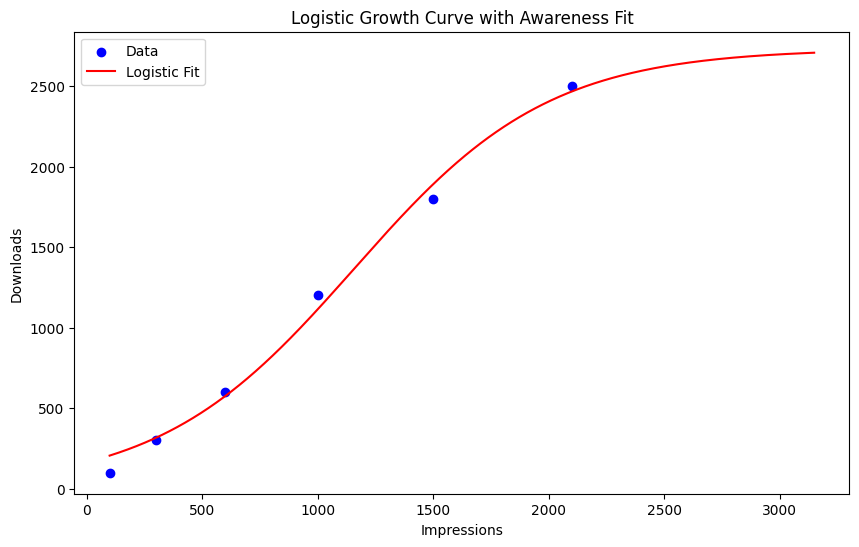

Optimal Parameters:
L (max downloads) = 2730.675672136796
k (growth rate) = 0.0023672454500801975
x0 (inflection point) = 1158.0934456681232


In [126]:
# サンプルデータ
data = pd.DataFrame({
    'impressions': [1000, 2000, 3000, 4000, 5000, 6000],
    'awareness_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
    'downloads': [100, 300, 600, 1200, 1800, 2500]
})

# 関数の実行
fit_logistic_curve_with_awareness(data)


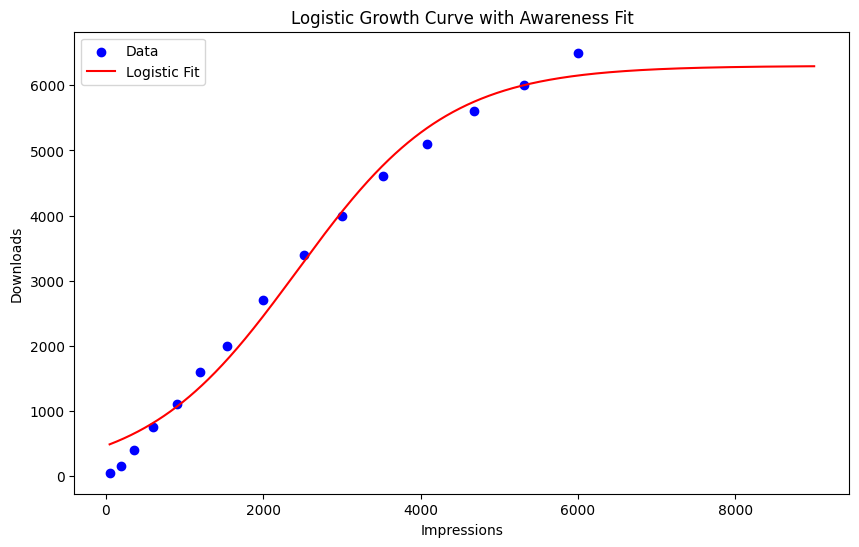

Optimal Parameters:
L (max downloads) = 6299.0445742145785
k (growth rate) = 0.0010424699560248156
x0 (inflection point) = 2431.069671426011


In [127]:
data = pd.DataFrame({
    'impressions': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000],
    'awareness_rate': [0.05, 0.1, 0.12, 0.15, 0.18, 0.2, 0.22, 0.25, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4],
    'downloads': [50, 150, 400, 750, 1100, 1600, 2000, 2700, 3400, 4000, 4600, 5100, 5600, 6000, 6500]
})

# 関数の実行
fit_logistic_curve_with_awareness(data)

## インプレッション数のみのモデル

In [129]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_logistic_curve(data):
    """
    インプレッション数、認知率、ダウンロード数を含むデータに基づいて、認知率を考慮した
    ロジスティック成長曲線をフィッティングし、結果をプロットします。

    Parameters:
    data (pd.DataFrame): インプレッション数 ('impressions'列)、認知率 ('awareness_rate'列)、ダウンロード数 ('downloads'列)を含むデータフレーム。
    """

    # ロジスティック成長曲線（認知率を考慮したバージョン）
    def logistic(x, L, k, x0):
        return L / (1 + np.exp(-k * (x  - x0)))

    # データの準備
    xdata = data['impressions']
    ydata = data['downloads']

    # 初期パラメータの設定
    p0 = [max(ydata), 0.001, np.median(xdata)]  # L, k, x0, a の初期値

    # フィッティング
    popt, _ = curve_fit(
        lambda x, L, k, x0: logistic(x, L, k, x0),
        xdata, ydata, p0=p0, maxfev=10000
    )

    # フィッティング結果の予測カーブの計算
    x_fit = np.linspace(min(xdata), max(xdata)*1.5, 1000)
    y_fit = logistic(x_fit, *popt)

    # 結果のプロット
    plt.figure(figsize=(10, 6))
    plt.scatter(xdata, ydata, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label='Logistic Fit', color='red')
    plt.xlabel('Impressions')
    plt.ylabel('Downloads')
    plt.legend()
    plt.title('Logistic Growth Curve with Awareness Fit')
    plt.show()

    # 最適パラメータの表示
    L, k, x0 = popt
    print(f"Optimal Parameters:\nL (max downloads) = {L}\nk (growth rate) = {k}\nx0 (inflection point) = {x0}")


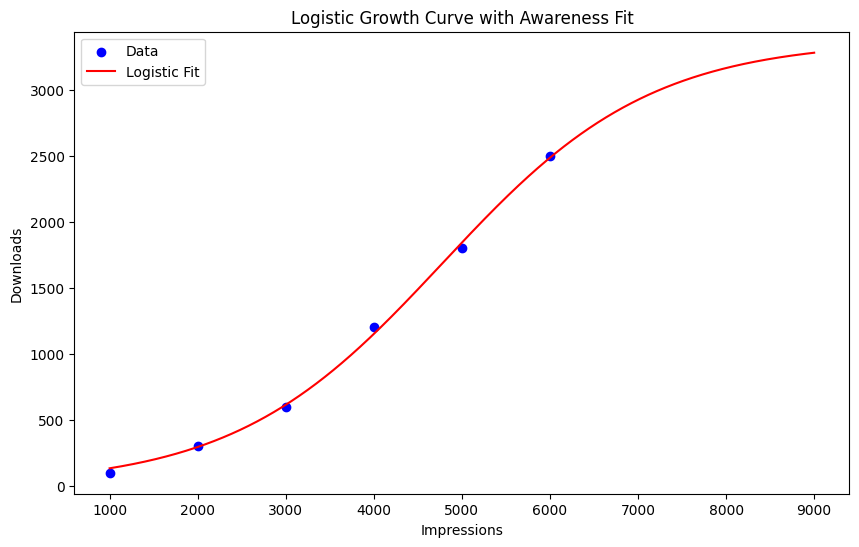

Optimal Parameters:
L (max downloads) = 3374.1511851988494
k (growth rate) = 0.0008436448660900605
x0 (inflection point) = 4780.156458025334


In [130]:
# サンプルデータ
data = pd.DataFrame({
    'impressions': [1000, 2000, 3000, 4000, 5000, 6000],
    'downloads': [100, 300, 600, 1200, 1800, 2500]
})

# 関数の実行
fit_logistic_curve(data)


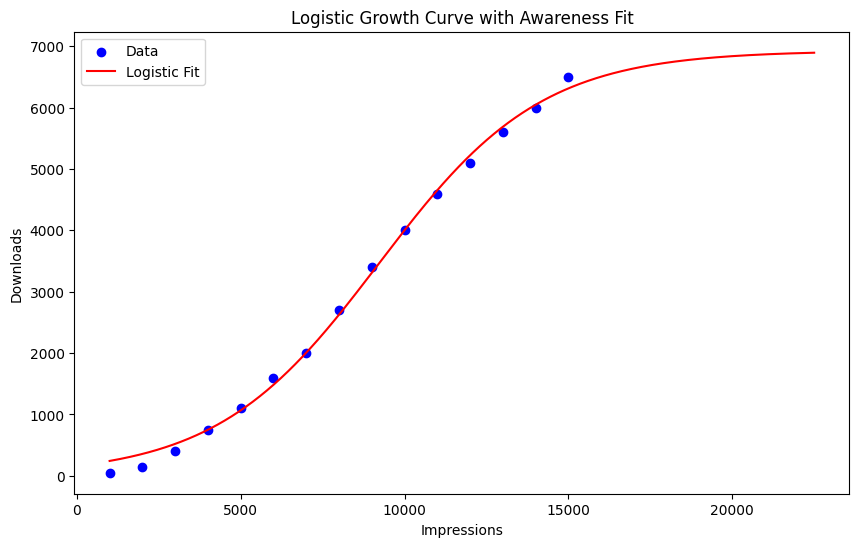

Optimal Parameters:
L (max downloads) = 6927.310623551661
k (growth rate) = 0.0004035118061065904
x0 (inflection point) = 9223.551302892254


In [131]:
data = pd.DataFrame({
    'impressions': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000],
    'awareness_rate': [0.05, 0.1, 0.12, 0.15, 0.18, 0.2, 0.22, 0.25, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4],
    'downloads': [50, 150, 400, 750, 1100, 1600, 2000, 2700, 3400, 4000, 4600, 5100, 5600, 6000, 6500]
})

# 関数の実行
fit_logistic_curve(data)

# サマリ
インプレッション数と認知率込みのモデルの方が最大DL数が控えめに算出される

# フィッティング部分の補足
    
    # 初期パラメータの設定
    p0 = [max(ydata), 0.001, np.median(xdata)]  # L, k, x0, a の初期値
    
    # フィッティング
    popt, _ = curve_fit(
        lambda x, L, k, x0: logistic(x, L, k, x0),
        xdata, ydata, p0=p0, maxfev=10000
    )


それぞれのコードを分解して説明します。

1. p0 = [max(ydata), 0.001, np.median(xdata), 1.0]
まず、p0 は curve_fit に最初に試す「初期のパラメータ」を与える変数です。この初期パラメータは、曲線を最適化するときの「出発点」となるもので、ここでは4つの値が含まれています。それぞれの意味を説明します。

max(ydata): 予測されるダウンロード数の上限
𝐿
L の初期値です。ここでは、ydata（実際のダウンロード数のデータ）の最大値を使っています。アプリがすごく人気が出た場合、ダウンロード数がどこまで増えるかを予想しています。
0.001: 成長率
𝑘
k の初期値です。この値は、ダウンロード数がどれくらい急に増えていくかを示します。小さい値ほど増え方がゆっくりになり、大きい値ほど急に増えます。
np.median(xdata): 成長が急激に変わるインプレッション数
𝑥
0
x
0
​
  の初期値です。xdata の中央の値（中央値）を使って、成長が急激に始まる場所を予想しています。
1.0: 認知率の影響度
𝑎
a の初期値です。この初期値を「1.0」にすることで、認知率がどのくらい影響するかを設定しています。
2. popt, _ = curve_fit(...)
次に curve_fit という関数を使って、データに最適な曲線を見つけます。この関数は「どのカーブが一番ぴったり合うか」を計算してくれる便利な道具です。popt は、最適なパラメータが入った変数で、この後のカーブ描画に使います。

3. curve_fit(lambda x, L, k, x0, a: logistic_curve_with_awareness(x, L, k, x0, a), xdata, ydata, p0=p0, maxfev=10000)
ここで、curve_fit の詳しい使い方について説明します。

lambda x, L, k, x0, a: logistic_curve_with_awareness(x, L, k, x0, a): curve_fit に渡すための関数を指定しています。lambda という言葉を使って、「インプレッション数
𝑥
x とパラメータ（
𝐿
L,
𝑘
k,
𝑥
0
x
0
​
 ,
𝑎
a）を受け取って、ダウンロード数を計算する」という関数を簡単に作っています。この関数は、logistic_curve_with_awareness という既に作った関数を使っています。

xdata: インプレッション数のデータです。このデータに基づいて、成長曲線がどれくらい増えていくかを計算します。

ydata: 実際のダウンロード数のデータです。curve_fit は、このデータにできるだけ近づくように、最適な曲線を作ります。

p0=p0: 上で設定した初期のパラメータを指定します。この初期値を使って、最適化をスタートさせます。

maxfev=10000: curve_fit が計算を何回まで繰り返すかの上限です。ここでは、最大10,000回まで計算を繰り返して、データにぴったり合うカーブが見つかるように設定しています。

4. popt の結果
最後に、popt という変数には、データに最も合うカーブを作るための最適な
𝐿
L,
𝑘
k,
𝑥
0
x
0
​
 ,
𝑎
a の値が入ります。このパラメータを使って、インプレッション数と認知率が増えていくときのダウンロード数の予測カーブを作れるようになります。